# Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential


# Reading in Training data

In [4]:
data = pd.read_csv("C:\\Users\\user\\Downloads\\HistoricalData_1656782463992.csv")

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day. High, Low and Last represent the maximum, minimum, and last price of the share for the day.

In [5]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/01/2022,$138.93,71051550,$136.04,$139.04,$135.66
1,06/30/2022,$136.72,98964470,$137.25,$138.37,$133.7737
2,06/29/2022,$139.23,66242410,$137.46,$140.67,$136.67
3,06/28/2022,$137.44,67315330,$142.13,$143.422,$137.325
4,06/27/2022,$141.66,70207910,$142.695,$143.49,$140.965


# Data Analysis and Pre-Processing

In [6]:
#columns have white spaces, which have to be removed
data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [8]:
#all the entries are in string format
data['Open'][2513]

'$21.6818'

In [12]:
for i in data.columns:
  if i!='Date':
    for j in range(0,2517):
      data[i][j] = str(data[i][j]).replace(' ','')
      data[i][j] = str(data[i][j]).replace('$','')


<ipython-input-12-e8a3fa2d7b7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = str(data[i][j]).replace(' ','')
<ipython-input-12-e8a3fa2d7b7e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = str(data[i][j]).replace('$','')


In [13]:
for i in data.columns:
  if i!='Date':
      data[i] = data[i].astype(float)

In [14]:
data


,Date,Close/Last,Volume,Open,High,Low
0,07/01/2022,138.9300,71051550.0,136.0400,139.0400,135.6600
1,06/30/2022,136.7200,98964470.0,137.2500,138.3700,133.7737
2,06/29/2022,139.2300,66242410.0,137.4600,140.6700,136.6700
3,06/28/2022,137.4400,67315330.0,142.1300,143.4220,137.3250
4,06/27/2022,141.6600,70207910.0,142.6950,143.4900,140.9650
...,...,...,...,...,...,...
2512,07/09/2012,21.9247,378806808.0,21.6179,21.9250,21.5754
2513,07/06/2012,21.6386,418772312.0,21.6818,21.7300,21.4850
2514,07/05/2012,21.7836,483913726.0,21.4486,21.9407,21.4161
2515,07/03/2012,21.4075,241712563.0,21.2457,21.4286,21.2143


In [15]:
data.Date = pd.to_datetime(data.Date)
data.sort_values('Date', ascending = True, inplace=True)

In [16]:
data

,Date,Close/Last,Volume,Open,High,Low
2516,2012-07-02,21.1614,399227480.0,20.8832,21.1954,20.8429
2515,2012-07-03,21.4075,241712563.0,21.2457,21.4286,21.2143
2514,2012-07-05,21.7836,483913726.0,21.4486,21.9407,21.4161
2513,2012-07-06,21.6386,418772312.0,21.6818,21.7300,21.4850
2512,2012-07-09,21.9247,378806808.0,21.6179,21.9250,21.5754
...,...,...,...,...,...,...
4,2022-06-27,141.6600,70207910.0,142.6950,143.4900,140.9650
3,2022-06-28,137.4400,67315330.0,142.1300,143.4220,137.3250
2,2022-06-29,139.2300,66242410.0,137.4600,140.6700,136.6700
1,2022-06-30,136.7200,98964470.0,137.2500,138.3700,133.7737


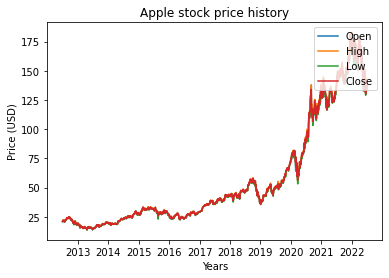

<Figure size 432x288 with 0 Axes>

In [17]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(data['Date'],data["Open"])
plt.plot(data['Date'],data["High"])
plt.plot(data['Date'],data["Low"])
plt.plot(data['Date'],data["Close/Last"])
plt.title('Apple stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Years')
plt.legend(['Open','High','Low','Close'], loc='upper right')
plt.show()
plt.savefig('Apple stock price history')

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence the closing price will be considered as the target variable.

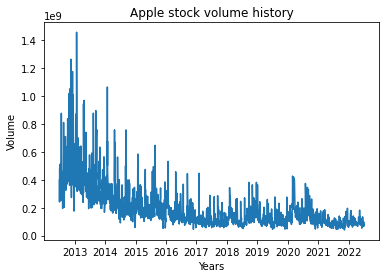

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure()
plt.plot(data["Date"],data["Volume"])
plt.title('Apple stock volume history')
plt.ylabel('Volume')
plt.xlabel('Years')
plt.show()
plt.savefig("Apple stock volume history")

In [19]:
#check whether null values present
data.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

# Creating the training and test data

In [62]:
df = data['Close/Last']
#df.set_index('Date', inplace=True)


In [63]:
df

2516     21.1614
2515     21.4075
2514     21.7836
2513     21.6386
2512     21.9247
          ...   
4       141.6600
3       137.4400
2       139.2300
1       136.7200
0       138.9300
Name: Close/Last, Length: 2517, dtype: float64

In [64]:
#normalizing the values for better predictions
scaler = MinMaxScaler(feature_range=(0,1))

In [65]:
# reshape the data before calling scaler.fit_transform because it works only on np arrays
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [66]:
df


array([[0.04292391],
       [0.04438825],
       [0.04662611],
       ...,
       [0.74545184],
       [0.73051692],
       [0.74366679]])

In [67]:
training_size = int(0.7*df.shape[0])
test_size = df.shape[0] - training_size
train_data = df[:training_size, :]
test_data = df[training_size:, :]

In [68]:
df.shape

(2517, 1)

In [69]:
test_data.shape

(756, 1)

In [70]:
train_data.shape

(1761, 1)

# Sliding Window Approach for the Training and Test Datasets

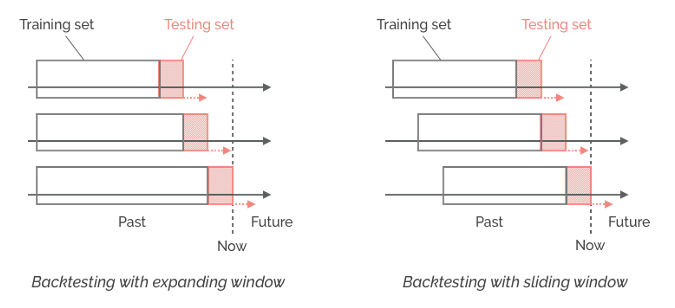

A window size of 100 is chosen for this particular dataframe.

In [71]:
window_size = 100

In [72]:
x_train2, y_train2 = [], []
for i in range(window_size, train_data.shape[0]):         # a single prediction on the basis of the last 100 days
  x_train2.append(train_data[i-window_size:i,0])
  y_train2.append(train_data[i,0])

x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
x_train2 = x_train2.reshape((x_train2.shape[0], x_train2.shape[1], 1))      # to make the input size compatible with the LSTM input size

In [73]:
x_test2, y_test2 = [], []
for i in range(window_size, test_data.shape[0]):
  x_test2.append(test_data[i-window_size:i, :])
  y_test2.append(test_data[i,:])

x_test2, y_test2 = np.array(x_test2), np.array(y_test2)

In [74]:
x_train2.shape

(1661, 100, 1)

In [75]:
x_test2.shape

(656, 100, 1)

In [76]:
model = Sequential()
model.add(LSTM(units = 50, input_shape = (x_train2.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
#model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1, activation = 'linear'))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train2, y_train2, validation_data = (x_test2, y_test2) ,epochs= 200, batch_size= 64, verbose=1)

Epoch 1/200
26/26 [==============================] - 15s 272ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 2/200
26/26 [==============================] - 6s 219ms/step - loss: 1.2718e-04 - val_loss: 0.0014
Epoch 3/200
26/26 [==============================] - 6s 227ms/step - loss: 8.4318e-05 - val_loss: 0.0013
Epoch 4/200
26/26 [==============================] - 6s 235ms/step - loss: 7.7990e-05 - val_loss: 0.0015
Epoch 5/200
26/26 [==============================] - 7s 259ms/step - loss: 7.9196e-05 - val_loss: 0.0017
Epoch 6/200
26/26 [==============================] - 7s 253ms/step - loss: 8.2544e-05 - val_loss: 0.0034
Epoch 7/200
26/26 [==============================] - 6s 228ms/step - loss: 7.3942e-05 - val_loss: 0.0032
Epoch 8/200
26/26 [==============================] - 7s 272ms/step - loss: 7.1284e-05 - val_loss: 0.0031
Epoch 9/200
26/26 [==============================] - 6s 243ms/step - loss: 7.0549e-05 - val_loss: 0.0032
Epoch 10/200
26/26 [==============================] - 6s 2

In [79]:
y_pred = scaler.inverse_transform(model.predict(x_test2))
y_test = scaler.inverse_transform(y_test2)

21/21 [==============================] - 3s 42ms/step


In [80]:
y_pred[:5]

array([[66.09887],
       [65.85032],
       [66.48174],
       [66.61447],
       [67.07816]], dtype=float32)

In [81]:
y_test[:5]

array([[65.445 ],
       [66.5925],
       [66.0725],
       [66.96  ],
       [66.8125]])

# Evaluation

In [82]:
import math
from sklearn.metrics import mean_squared_error

rmse_score = math.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ',rmse_score)

Root Mean Squared Error :  6.288010136195971


In [83]:
from sklearn.metrics import r2_score
print('R-squared Score  : ',r2_score(y_test,y_pred))

R-squared Score  :  0.9637482984257008


52/52 [==============================] - 2s 43ms/step


No handles with labels found to put in legend.


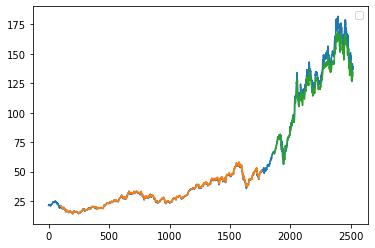

In [84]:
# shift train predictions for plotting
train_predict = scaler.inverse_transform(model.predict(x_train2))

look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df), :] = y_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

# Future Prediction

In [85]:
x_input = test_data[len(test_data)-window_size:, 0]

In [86]:
x_input=x_input.reshape(1,-1)

In [87]:
# we have the data of 100 days for a single prediction 
x_input.shape

(1, 100)

In [88]:
x_input_list = list(x_input)
x_input_list = list(x_input_list[0])

In [89]:
x_input = x_input.reshape((1, window_size, 1))
prediction = model.predict(x_input)
prediction[0][0]

1/1 [==============================] - 0s 39ms/step


0.7028312

In [90]:
x_input_list.append(prediction[0][0])

In [91]:
x_input_list

[0.9572777984380813,
 0.9659055410933434,
 0.9411528449237635,
 0.9204462625511342,
 0.9218743027147639,
 0.9451394570472295,
 0.9437114168835999,
 0.9218743027147639,
 0.9124730383042023,
 0.8947415396058014,
 0.8694533283748606,
 0.88534027519524,
 0.8978951283004835,
 0.8995016734845668,
 0.8880773521755299,
 0.9080699144663444,
 0.9061063592413536,
 0.8878988471550762,
 0.864871699516549,
 0.8538043882484195,
 0.8865898103384157,
 0.8602305689847528,
 0.8376794347341019,
 0.813224246931945,
 0.8398214949795463,
 0.8665972480476014,
 0.8727259204165118,
 0.8927184827073261,
 0.9010487169951654,
 0.9215172926738565,
 0.9297880252882113,
 0.952755671253254,
 0.9566232800297508,
 0.9618594272963926,
 0.9818519895872072,
 0.9747712904425437,
 0.9559687616214206,
 0.9541837114168835,
 0.9787579025660097,
 0.9586463369282262,
 0.9394272963927112,
 0.9412718482707326,
 0.9290740052063965,
 0.9032502789140945,
 0.9146150985496467,
 0.930918557084418,
 0.9005132019338044,
 0.8992041651171438

In [92]:
len(x_input_list)

101

In [93]:
# since we only need 100 values for our prediction
x_input_list.remove(x_input_list[0])

In [94]:
x_input_list

[0.9659055410933434,
 0.9411528449237635,
 0.9204462625511342,
 0.9218743027147639,
 0.9451394570472295,
 0.9437114168835999,
 0.9218743027147639,
 0.9124730383042023,
 0.8947415396058014,
 0.8694533283748606,
 0.88534027519524,
 0.8978951283004835,
 0.8995016734845668,
 0.8880773521755299,
 0.9080699144663444,
 0.9061063592413536,
 0.8878988471550762,
 0.864871699516549,
 0.8538043882484195,
 0.8865898103384157,
 0.8602305689847528,
 0.8376794347341019,
 0.813224246931945,
 0.8398214949795463,
 0.8665972480476014,
 0.8727259204165118,
 0.8927184827073261,
 0.9010487169951654,
 0.9215172926738565,
 0.9297880252882113,
 0.952755671253254,
 0.9566232800297508,
 0.9618594272963926,
 0.9818519895872072,
 0.9747712904425437,
 0.9559687616214206,
 0.9541837114168835,
 0.9787579025660097,
 0.9586463369282262,
 0.9394272963927112,
 0.9412718482707326,
 0.9290740052063965,
 0.9032502789140945,
 0.9146150985496467,
 0.930918557084418,
 0.9005132019338044,
 0.8992041651171438,
 0.913068055039048,

In [95]:
x_input = np.array(x_input_list)
x_input = x_input.reshape((1, window_size, 1))
prediction = model.predict(x_input)
prediction[0][0]

1/1 [==============================] - 0s 45ms/step


0.68377846

In [96]:
scaler.inverse_transform([[0.7458584, 0.68279654]])

array([[139.29832735, 128.6999935 ]])

# Combining everything into a single block

In [97]:
x_input = test_data[len(test_data)-window_size:, 0].reshape((1, window_size))
x_input_list = list(x_input[0])
days = 10

for i in range(days):
  x_input = np.array(x_input_list)
  prediction =  model.predict(x_input.reshape(1, window_size, 1))
  print(f'Prediction for day {i+1}:', scaler.inverse_transform(prediction)[0][0])
  x_input_list.append(prediction[0][0])
  x_input_list.remove(x_input_list[0])

1/1 [==============================] - 0s 47ms/step
Prediction for day 1: 132.06706
1/1 [==============================] - 0s 47ms/step
Prediction for day 2: 128.86502
1/1 [==============================] - 0s 39ms/step
Prediction for day 3: 125.18837
1/1 [==============================] - 0s 49ms/step
Prediction for day 4: 121.768974
1/1 [==============================] - 0s 56ms/step
Prediction for day 5: 118.723
1/1 [==============================] - 0s 64ms/step
Prediction for day 6: 116.01129
1/1 [==============================] - 0s 56ms/step
Prediction for day 7: 113.5584
1/1 [==============================] - 0s 58ms/step
Prediction for day 8: 111.2908
1/1 [==============================] - 0s 57ms/step
Prediction for day 9: 109.148895
1/1 [==============================] - 0s 64ms/step
Prediction for day 10: 107.08914


In [98]:
x_input_list

[0.8694533283748606,
 0.88534027519524,
 0.8978951283004835,
 0.8995016734845668,
 0.8880773521755299,
 0.9080699144663444,
 0.9061063592413536,
 0.8878988471550762,
 0.864871699516549,
 0.8538043882484195,
 0.8865898103384157,
 0.8602305689847528,
 0.8376794347341019,
 0.813224246931945,
 0.8398214949795463,
 0.8665972480476014,
 0.8727259204165118,
 0.8927184827073261,
 0.9010487169951654,
 0.9215172926738565,
 0.9297880252882113,
 0.952755671253254,
 0.9566232800297508,
 0.9618594272963926,
 0.9818519895872072,
 0.9747712904425437,
 0.9559687616214206,
 0.9541837114168835,
 0.9787579025660097,
 0.9586463369282262,
 0.9394272963927112,
 0.9412718482707326,
 0.9290740052063965,
 0.9032502789140945,
 0.9146150985496467,
 0.930918557084418,
 0.9005132019338044,
 0.8992041651171438,
 0.913068055039048,
 0.9120565265898103,
 0.9072368910375603,
 0.879687616214206,
 0.8861732986240238,
 0.8499962811454073,
 0.8486277426552622,
 0.8906954258088507,
 0.8550539233915955,
 0.856898475269617,
 

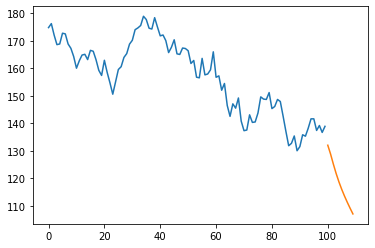

In [99]:
plt.plot(np.arange(0,window_size), scaler.inverse_transform(test_data[len(test_data)-window_size:]))
plt.plot(np.arange(window_size,window_size + 10), scaler.inverse_transform(np.array(x_input_list[-10:]).reshape(-1,1)))